<a href="https://colab.research.google.com/github/gabbylancs/ComputerVisionExamples/blob/main/odometry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Potentiometer: SXM30-750-1RE-LF-O
ADC: 0-> 5V 1023 adc/1023 * 750mm = distance
sequence
1: Inflate Front
2: Deflate Back
3: Deflate Middle
4: Vaccuum Middle
5: Inflate Back
6: Deflate Front
7: Deflate Middle
8: Infalte Front

Images are taken after the sequence step
Arduino output: TIME, VECTOR_ACCELEROMETER - m/s^2, VECTOR_GYROSCOPE - rads VECTOR_MAGNETOMETER  - uT, QUATERNION DATA (madgwick)


In [ ]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("/content/drive/MyDrive/stitches/odometry/stitches/stitches1.txt", sep=' ', header=None)
print("DataFrame loaded from 'input.csv':")
display(df.head())


DataFrame loaded from 'input.csv':


,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,12:49:13.899,->,X:,9.17,Y:,1.21,Z:,-1.12\X:,0.88,Y:,...,Z:,-35.38\qW:,0.6587,qX:,0.1040,qY:,-0.7452,qZ:,0.0042\pot:,37
1,12:49:14.028,->,X:,9.10,Y:,1.19,Z:,-1.41\X:,-0.44,Y:,...,Z:,-34.88\qW:,0.6567,qX:,0.1040,qY:,-0.7469,qZ:,0.0026\pot:,37
2,12:49:14.126,->,X:,9.58,Y:,1.44,Z:,-1.06\X:,1.88,Y:,...,Z:,-34.88\qW:,0.6550,qX:,0.1044,qY:,-0.7484,qZ:,0.0019\pot:,37
3,12:49:14.255,->,X:,9.39,Y:,1.36,Z:,-1.16\X:,0.69,Y:,...,Z:,-33.69\qW:,0.6531,qX:,0.1044,qY:,-0.7501,qZ:,0.0031\pot:,36
4,12:49:14.352,->,X:,9.33,Y:,1.21,Z:,-1.15\X:,1.06,Y:,...,Z:,-34.50\qW:,0.6505,qX:,0.1058,qY:,-0.7521,qZ:,0.0035\pot:,35


In [ ]:
new_df = df.iloc[:, [0, 3, 5, 7, 8, 10, 12, 13, 15, 17, 18, 20, 22, 24, 25]]

new_column_names = {
    0: 'time',
    3: 'accX',
    5: 'accY',
    7: 'accZ',
    8: 'gyroX',
    10: 'gyroY',
    12: 'gyroZ',
    13: 'magX',
    15: 'magY',
    17: 'magZ',
    18: 'q1',
    20: 'q2',
    22: 'q3',
    24: 'q4',
    25: 'pot'
}

new_df = new_df.rename(columns=new_column_names)

new_df['accZ'] = new_df['accZ'].str[:-3]
new_df['gyroZ'] = new_df['gyroZ'].str[:-3]
new_df['magZ'] = new_df['magZ'].str[:-4]
new_df['q4'] = new_df['q4'].str[:-5]

new_df['accZ'] = pd.to_numeric(new_df['accZ'])
new_df['gyroZ'] = pd.to_numeric(new_df['gyroZ'])
new_df['magZ'] = pd.to_numeric(new_df['magZ'])
new_df['q4'] = pd.to_numeric(new_df['q4'])
new_df['pot'] = pd.to_numeric(new_df['pot'])

new_df['time'] = pd.to_datetime(new_df['time'], format='%H:%M:%S.%f')
first_timestamp = new_df['time'].iloc[0]
new_df['time_ms'] = (new_df['time'] - first_timestamp).dt.total_seconds() * 1000
new_df['distance'] = new_df['pot'] * 750 / 1023

display(new_df.head())

,time,accX,accY,accZ,gyroX,gyroY,gyroZ,magX,magY,magZ,q1,q2,q3,q4,pot,time_ms,distance
0,1900-01-01 12:49:13.899,9.17,1.21,-1.12,0.88,-2.50,1.25,-37.19,-31.25,-35.38,0.6587,0.1040,-0.7452,0.0042,37,0.0,27.126100
1,1900-01-01 12:49:14.028,9.10,1.19,-1.41,-0.44,-4.69,0.31,-37.19,-31.00,-34.88,0.6567,0.1040,-0.7469,0.0026,37,129.0,27.126100
2,1900-01-01 12:49:14.126,9.58,1.44,-1.06,1.88,-1.75,4.13,-36.06,-30.25,-34.88,0.6550,0.1044,-0.7484,0.0019,37,227.0,27.126100
3,1900-01-01 12:49:14.255,9.39,1.36,-1.16,0.69,-3.81,1.06,-38.00,-30.25,-33.69,0.6531,0.1044,-0.7501,0.0031,36,356.0,26.392962
4,1900-01-01 12:49:14.352,9.33,1.21,-1.15,1.06,-1.63,-3.13,-38.06,-29.87,-34.50,0.6505,0.1058,-0.7521,0.0035,35,453.0,25.659824


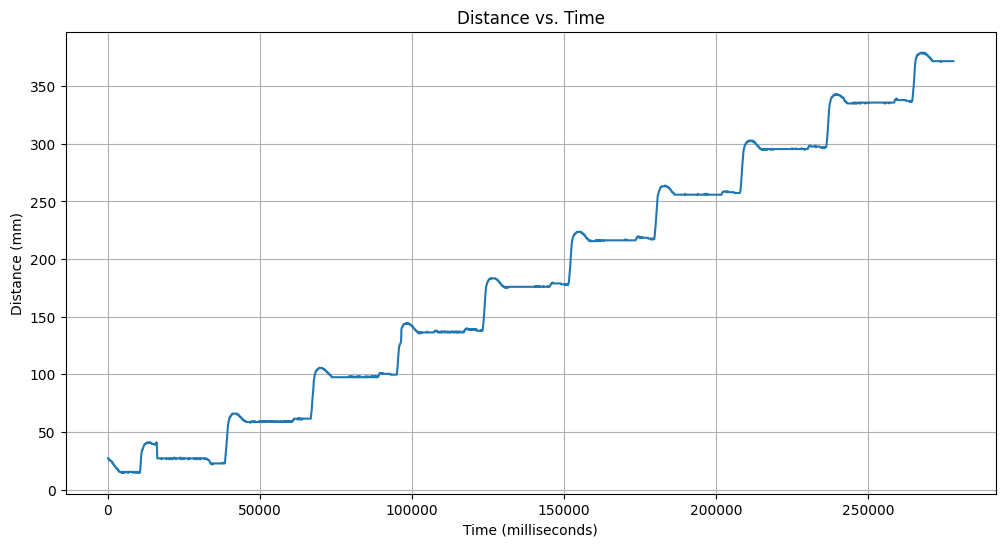

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(new_df['time_ms'], new_df['distance'])
plt.xlabel('Time (milliseconds)')
plt.ylabel('Distance (mm)')
plt.title('Distance vs. Time')
plt.grid(True)
plt.show()

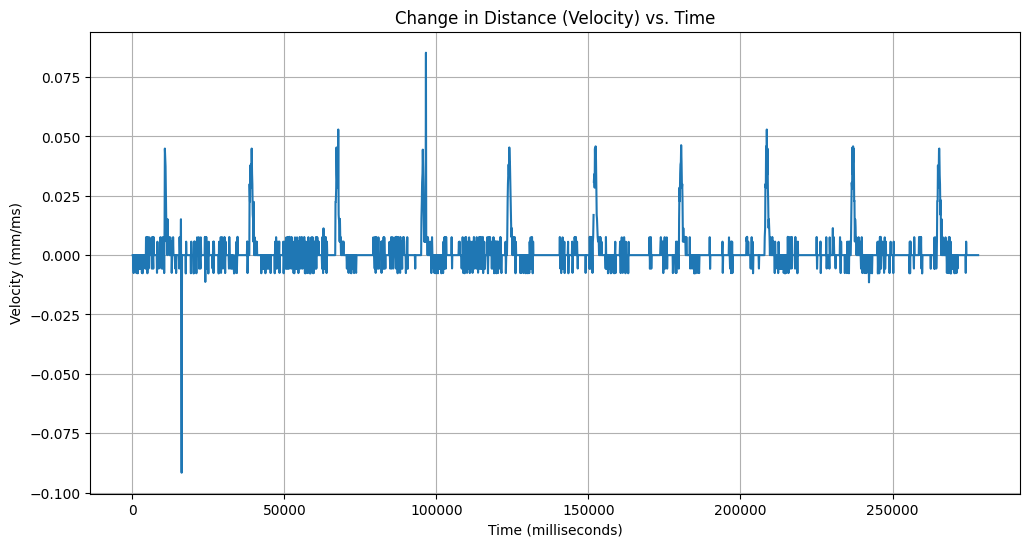

In [ ]:
import matplotlib.pyplot as plt

# Calculate the change in distance (dx)
dx = new_df['distance'].diff()

# Calculate the change in time (dt)
dt = new_df['time_ms'].diff()

# Calculate velocity (dx/dt)
new_df['velocity'] = dx / dt

# Plot the velocity vs. time
plt.figure(figsize=(12, 6))
plt.plot(new_df['time_ms'], new_df['velocity'])
plt.xlabel('Time (milliseconds)')
plt.ylabel('Velocity (mm/ms)')
plt.title('Change in Distance (Velocity) vs. Time')
plt.grid(True)
plt.show()

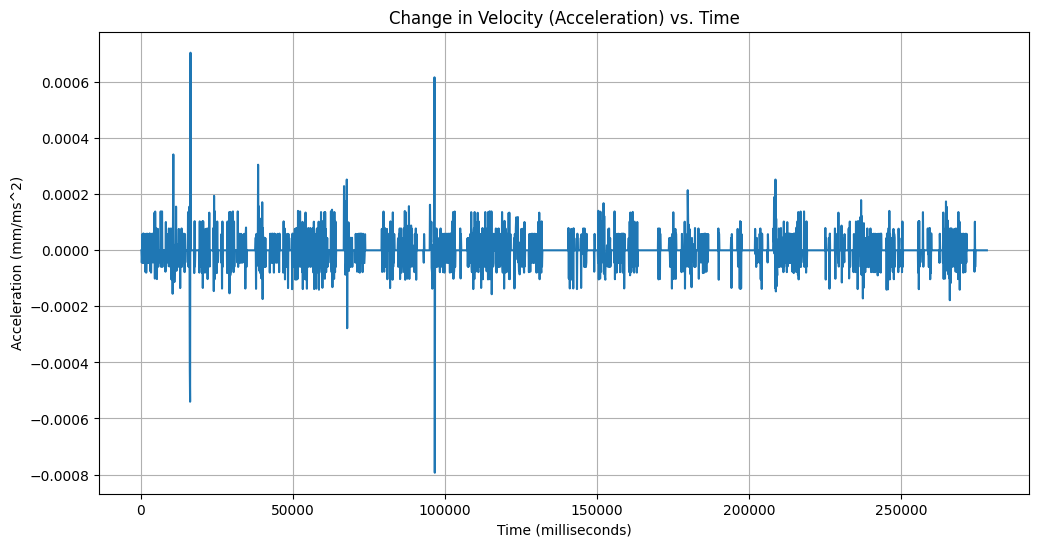

In [ ]:
import matplotlib.pyplot as plt

# Calculate the change in velocity (dv)
dv = new_df['velocity'].diff()

# dt is already calculated from the previous step
# Calculate acceleration (dv/dt)
new_df['acceleration'] = dv / dt

# Plot the acceleration vs. time
plt.figure(figsize=(12, 6))
plt.plot(new_df['time_ms'], new_df['acceleration'])
plt.xlabel('Time (milliseconds)')
plt.ylabel('Acceleration (mm/ms^2)')
plt.title('Change in Velocity (Acceleration) vs. Time')
plt.grid(True)
plt.show()

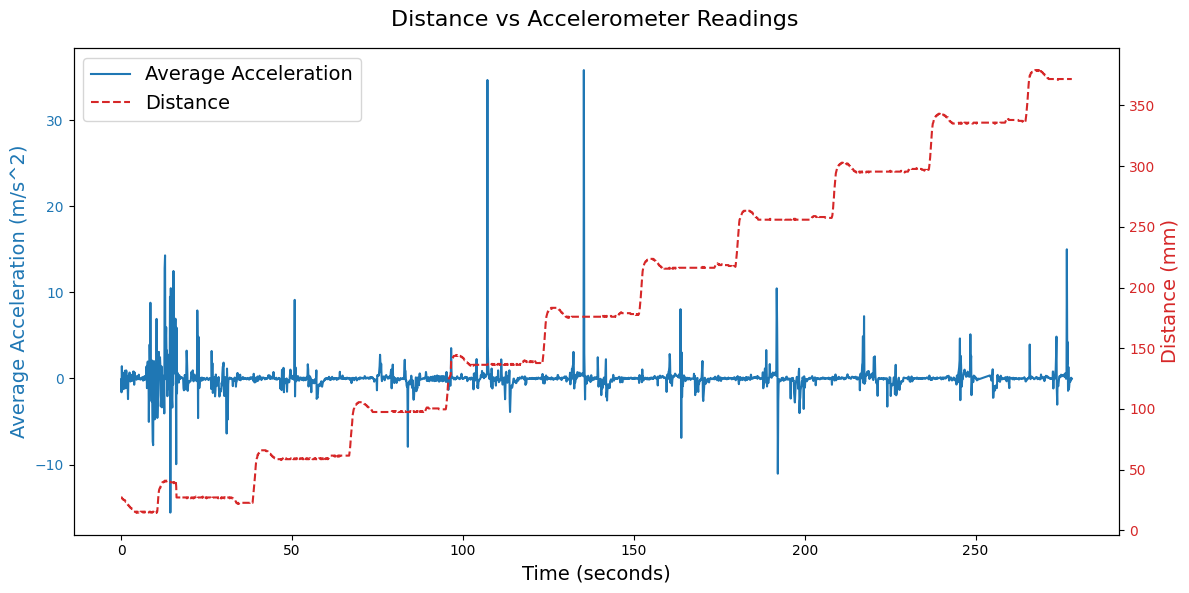

In [ ]:
import matplotlib.pyplot as plt

# Calculate the average of accX, accY, and accZ for each row
new_df['avg_acc'] = new_df[['gyroX', 'gyroY', 'gyroZ']].mean(axis=1)

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Average Acceleration on the primary y-axis
color = 'tab:blue'
ax1.set_xlabel('Time (seconds)', fontsize=14)
ax1.set_ylabel('Average Acceleration (m/s^2)', color=color, fontsize=14)
ax1.plot(new_df['time_ms']/1000, new_df['avg_acc'], color=color, label='Average Acceleration')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(False)

# Create a secondary y-axis for Acceleration
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Distance (mm)', color=color, fontsize=14)
ax2.plot(new_df['time_ms']/1000, new_df['distance'], color=color, linestyle='--', label='Distance')
ax2.tick_params(axis='y', labelcolor=color)

# Add title and legend
fig.suptitle('Distance vs Accelerometer Readings', fontsize=16)
fig.tight_layout()  # Adjust layout to prevent overlapping
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left', fontsize=14)

plt.show()

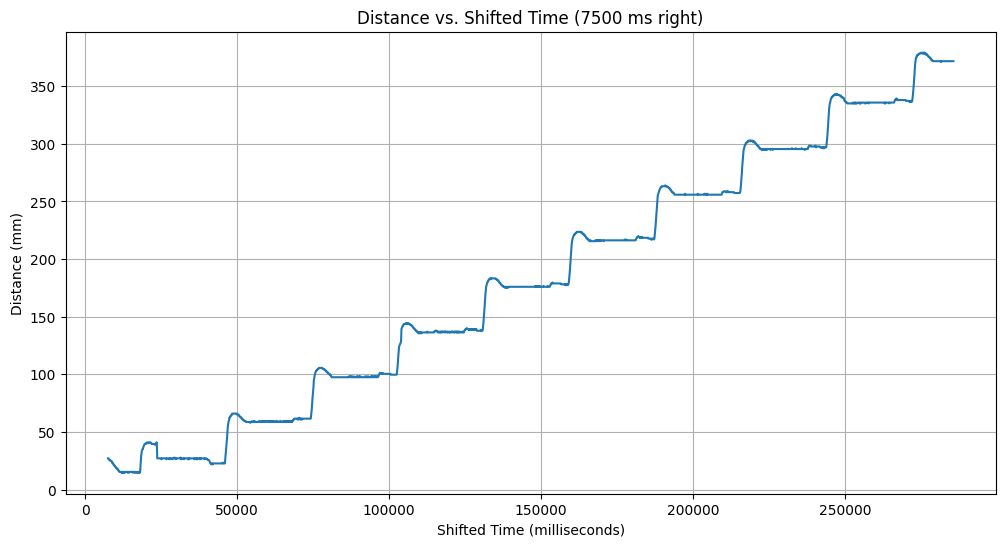

In [ ]:
import matplotlib.pyplot as plt

# Create a new column for shifted time
new_df['time_ms_shifted'] = new_df['time_ms'] + 7500

plt.figure(figsize=(12, 6))
plt.plot(new_df['time_ms_shifted'], new_df['distance'])
plt.xlabel('Shifted Time (milliseconds)')
plt.ylabel('Distance (mm)')
plt.title('Distance vs. Shifted Time (7500 ms right)')
plt.grid(True)
plt.show()

In [ ]:
import os

image_dir = '/content/drive/MyDrive/stitches/odometry/stitches/images'
image_data = []

common_image_extensions = ['.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff']

for filename in os.listdir(image_dir):
    name_without_extension, extension = os.path.splitext(filename)
    if extension.lower() in common_image_extensions:
        # Split by '_' and append to image_data
        split_name = name_without_extension.split('_')
        if len(split_name) == 2:
            image_data.append(split_name)

print("First 10 entries of image_data:")
print(image_data[:10])

image_df = pd.DataFrame(image_data, columns=['time', 'sequence_number'])

# Convert columns to numeric if applicable
image_df['time'] = pd.to_numeric(image_df['time'])
image_df['sequence_number'] = pd.to_numeric(image_df['sequence_number'])

display(image_df.head())

First 10 entries of image_data:
[['3502', '1'], ['7597', '2'], ['9820', '3'], ['13832', '4'], ['17927', '5'], ['21962', '6'], ['26041', '7'], ['28074', '8'], ['32099', '1'], ['36129', '2']]


,time,sequence_number
0,3502,1
1,7597,2
2,9820,3
3,13832,4
4,17927,5


In [ ]:
new_df = new_df.sort_values(by='time_ms')
image_df = image_df.sort_values(by='time')

In [ ]:
print("New_df with sequence_number (head):")
display(new_df.head())

print("New_df with sequence_number (tail):")
display(new_df.tail())

New_df with sequence_number (head):


,time,accX,accY,accZ,gyroX,gyroY,gyroZ,magX,magY,magZ,...,q2,q3,q4,pot,time_ms,distance,velocity,acceleration,avg_acc,time_ms_shifted
0,1900-01-01 12:49:13.899,9.17,1.21,-1.12,0.88,-2.50,1.25,-37.19,-31.25,-35.38,...,0.1040,-0.7452,0.0042,37,0.0,27.126100,NaN,NaN,-0.123333,7500.0
1,1900-01-01 12:49:14.028,9.10,1.19,-1.41,-0.44,-4.69,0.31,-37.19,-31.00,-34.88,...,0.1040,-0.7469,0.0026,37,129.0,27.126100,0.000000,NaN,-1.606667,7629.0
2,1900-01-01 12:49:14.126,9.58,1.44,-1.06,1.88,-1.75,4.13,-36.06,-30.25,-34.88,...,0.1044,-0.7484,0.0019,37,227.0,27.126100,0.000000,0.000000,1.420000,7727.0
3,1900-01-01 12:49:14.255,9.39,1.36,-1.16,0.69,-3.81,1.06,-38.00,-30.25,-33.69,...,0.1044,-0.7501,0.0031,36,356.0,26.392962,-0.005683,-0.000044,-0.686667,7856.0
4,1900-01-01 12:49:14.352,9.33,1.21,-1.15,1.06,-1.63,-3.13,-38.06,-29.87,-34.50,...,0.1058,-0.7521,0.0035,35,453.0,25.659824,-0.007558,-0.000019,-1.233333,7953.0


New_df with sequence_number (tail):


,time,accX,accY,accZ,gyroX,gyroY,gyroZ,magX,magY,magZ,...,q2,q3,q4,pot,time_ms,distance,velocity,acceleration,avg_acc,time_ms_shifted
2433,1900-01-01 12:53:51.590,9.27,-2.40,-0.75,-0.37,-0.63,-0.19,-26.50,-3.38,-37.38,...,-0.1862,-0.7103,-0.0078,507,277691.0,371.70088,0.0,0.0,-0.396667,285191.0
2434,1900-01-01 12:53:51.720,9.69,-2.48,-0.86,-0.12,-0.50,0.06,-26.50,-3.75,-36.56,...,-0.1866,-0.7103,-0.0080,507,277821.0,371.70088,0.0,0.0,-0.186667,285321.0
2435,1900-01-01 12:53:51.819,9.70,-2.46,-0.87,0.25,-0.06,0.06,-25.75,-3.38,-36.19,...,-0.1868,-0.7103,-0.0081,507,277920.0,371.70088,0.0,0.0,0.083333,285420.0
2436,1900-01-01 12:53:51.948,9.75,-2.49,-0.86,0.06,-0.31,-0.12,-27.25,-3.06,-36.56,...,-0.1868,-0.7103,-0.0081,507,278049.0,371.70088,0.0,0.0,-0.123333,285549.0
2437,1900-01-01 12:53:52.045,9.78,-2.49,-0.84,0.12,-0.25,0.06,-25.75,-3.38,-37.38,...,-0.1870,-0.7104,-0.0081,507,278146.0,371.70088,0.0,0.0,-0.023333,285646.0


In [ ]:
# Ensure new_df is correctly populated from merged_df with the sequence number
# Re-doing the reconstruction steps from merged_df

# Create a copy to avoid modifying merged_df directly if not intended later
new_df = new_df.copy()

# Rename the original time column from new_df (now 'time_x') back to 'time'
new_df = new_df.rename(columns={'time_x': 'time_original'}) # Renaming to avoid conflict with `image_df['time']`

# Drop the 'time' column that came from image_df (now 'time_y')
if 'time_y' in new_df.columns:
    new_df = new_df.drop(columns=['time_y'])

# Rename the sequence number column from image_df (now 'sequence_number_y') to 'sequence_number'
if 'sequence_number_y' in new_df.columns:
    new_df = new_df.rename(columns={'sequence_number_y': 'sequence_number'})

# Drop any redundant 'sequence_number_x' if it exists (which it shouldn't if we're using merged_df directly)
if 'sequence_number_x' in new_df.columns:
    new_df = new_df.drop(columns=['sequence_number_x'])


print("New_df after final reconstruction (head):")
display(new_df.head())

print("New_df after final reconstruction (tail):")
display(new_df.tail())

print("Columns in new_df after final reconstruction:")
print(new_df.columns)

New_df after final reconstruction (head):


,time,accX,accY,accZ,gyroX,gyroY,gyroZ,magX,magY,magZ,...,q2,q3,q4,pot,time_ms,distance,velocity,acceleration,avg_acc,time_ms_shifted
0,1900-01-01 12:49:13.899,9.17,1.21,-1.12,0.88,-2.50,1.25,-37.19,-31.25,-35.38,...,0.1040,-0.7452,0.0042,37,0.0,27.126100,NaN,NaN,-0.123333,7500.0
1,1900-01-01 12:49:14.028,9.10,1.19,-1.41,-0.44,-4.69,0.31,-37.19,-31.00,-34.88,...,0.1040,-0.7469,0.0026,37,129.0,27.126100,0.000000,NaN,-1.606667,7629.0
2,1900-01-01 12:49:14.126,9.58,1.44,-1.06,1.88,-1.75,4.13,-36.06,-30.25,-34.88,...,0.1044,-0.7484,0.0019,37,227.0,27.126100,0.000000,0.000000,1.420000,7727.0
3,1900-01-01 12:49:14.255,9.39,1.36,-1.16,0.69,-3.81,1.06,-38.00,-30.25,-33.69,...,0.1044,-0.7501,0.0031,36,356.0,26.392962,-0.005683,-0.000044,-0.686667,7856.0
4,1900-01-01 12:49:14.352,9.33,1.21,-1.15,1.06,-1.63,-3.13,-38.06,-29.87,-34.50,...,0.1058,-0.7521,0.0035,35,453.0,25.659824,-0.007558,-0.000019,-1.233333,7953.0


New_df after final reconstruction (tail):


,time,accX,accY,accZ,gyroX,gyroY,gyroZ,magX,magY,magZ,...,q2,q3,q4,pot,time_ms,distance,velocity,acceleration,avg_acc,time_ms_shifted
2433,1900-01-01 12:53:51.590,9.27,-2.40,-0.75,-0.37,-0.63,-0.19,-26.50,-3.38,-37.38,...,-0.1862,-0.7103,-0.0078,507,277691.0,371.70088,0.0,0.0,-0.396667,285191.0
2434,1900-01-01 12:53:51.720,9.69,-2.48,-0.86,-0.12,-0.50,0.06,-26.50,-3.75,-36.56,...,-0.1866,-0.7103,-0.0080,507,277821.0,371.70088,0.0,0.0,-0.186667,285321.0
2435,1900-01-01 12:53:51.819,9.70,-2.46,-0.87,0.25,-0.06,0.06,-25.75,-3.38,-36.19,...,-0.1868,-0.7103,-0.0081,507,277920.0,371.70088,0.0,0.0,0.083333,285420.0
2436,1900-01-01 12:53:51.948,9.75,-2.49,-0.86,0.06,-0.31,-0.12,-27.25,-3.06,-36.56,...,-0.1868,-0.7103,-0.0081,507,278049.0,371.70088,0.0,0.0,-0.123333,285549.0
2437,1900-01-01 12:53:52.045,9.78,-2.49,-0.84,0.12,-0.25,0.06,-25.75,-3.38,-37.38,...,-0.1870,-0.7104,-0.0081,507,278146.0,371.70088,0.0,0.0,-0.023333,285646.0


Columns in new_df after final reconstruction:
Index(['time', 'accX', 'accY', 'accZ', 'gyroX', 'gyroY', 'gyroZ', 'magX',
       'magY', 'magZ', 'q1', 'q2', 'q3', 'q4', 'pot', 'time_ms', 'distance',
       'velocity', 'acceleration', 'avg_acc', 'time_ms_shifted'],
      dtype='object')


KeyError: 'sequence_number'

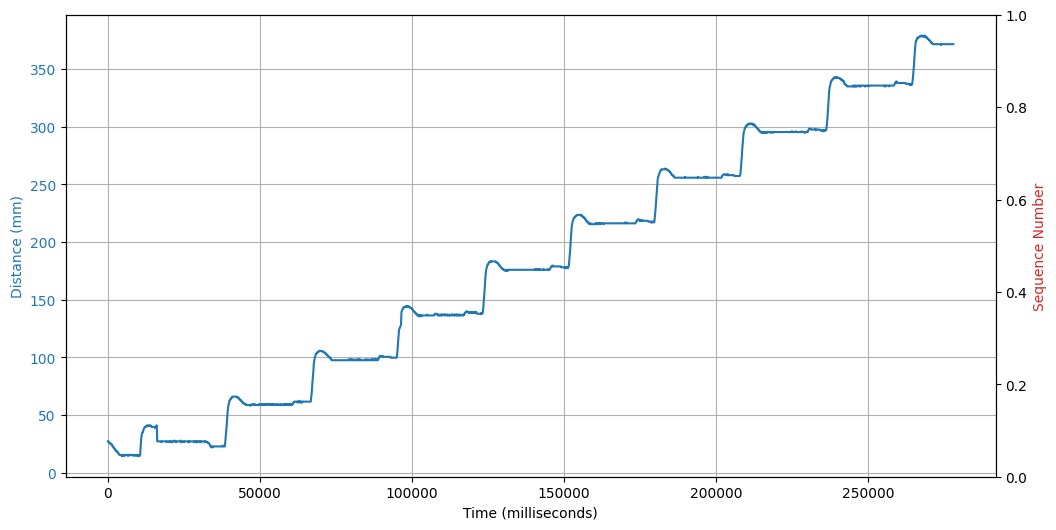

In [ ]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Distance on the primary y-axis
color = 'tab:blue'
ax1.set_xlabel('Time (milliseconds)')
ax1.set_ylabel('Distance (mm)', color=color)
ax1.plot(new_df['time_ms'], new_df['distance'], color=color, label='Distance (mm)')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True)

# Create a secondary y-axis for Sequence Number
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Sequence Number', color=color)
ax2.plot(new_df['time_ms'], new_df['sequence_number'], color=color, linestyle='--', label='Sequence Number')
ax2.tick_params(axis='y', labelcolor=color)

# Add title and legend
fig.suptitle('Distance and Sequence Number vs. Time', fontsize=16)
fig.tight_layout()  # Adjust layout to prevent overlapping
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()

In [ ]:
display(new_df)


# Task
Define time intervals starting from 46617 ms, with a duration of 28217 ms, covering the entire 'time_ms' range of `new_df`. For each interval, calculate the distance moved by taking the 'distance' value at the start and end of the interval from `new_df` (using the closest available data points). Then, calculate the average and variance of these distance movements across all intervals and display the results.

## Define Time Intervals and Calculate Distance Moved

### Subtask:
Generate time intervals starting from 46617 ms, with a duration of 28217 ms, covering the entire 'time_ms' range of `new_df`. For each interval, calculate the distance moved by taking the 'distance' value at the start and end of the interval from `new_df` (using the closest available data points if exact matches are not found). Store these distance movements with their corresponding intervals.


**Reasoning**:
The subtask requires defining time intervals, calculating the distance moved within each interval, and storing these results in a new DataFrame. I will implement the specified steps to achieve this, including initializing variables, looping through the time range, finding closest data points for distance, calculating distance moved, and finally constructing a DataFrame.



In [ ]:
start_interval_time = 46617
interval_duration = 28217
max_time_ms = new_df['time_ms'].max()

distance_movements = []

current_start_time = start_interval_time

while current_start_time <= max_time_ms:
    interval_start_time = current_start_time
    interval_end_time = current_start_time + interval_duration

    # Find the row with the time_ms closest to interval_start_time
    start_point_row = new_df.iloc[(new_df['time_ms'] - interval_start_time).abs().argsort()[:1]]
    start_distance = start_point_row['distance'].values[0]

    # Find the row with the time_ms closest to interval_end_time
    end_point_row = new_df.iloc[(new_df['time_ms'] - interval_end_time).abs().argsort()[:1]]
    end_distance = end_point_row['distance'].values[0]

    distance_moved = end_distance - start_distance

    distance_movements.append({
        'interval_start_time': interval_start_time,
        'interval_end_time': interval_end_time,
        'distance_moved': distance_moved
    })

    current_start_time += interval_duration

distance_movements_df = pd.DataFrame(distance_movements)

print("Distance movements per interval:")
display(distance_movements_df.head())

In [ ]:
mean_distance_moved = distance_movements_df['distance_moved'].mean()
std_dev_distance_moved = distance_movements_df['distance_moved'].std()

print(f"Average distance moved in distance_movements_df: {mean_distance_moved:.2f} mm")
print(f"Standard deviation of distance moved in distance_movements_df: {std_dev_distance_moved:.2f} mm")

In [ ]:
variance_distance_moved = distance_movements_df['distance_moved'].var()

print(f"Variance of distance moved in distance_movements_df: {variance_distance_moved:.2f} mm^2")

In [ ]:
d = (40.32258064516131 + 40.32258064516128 + 39.58944281524927 + 38.12316715542522 + 38.85630498533724)/5
e1 = d - 38.12316715542522
e2 = 40.32258064516131 - d

d
e1
#e2